**<h1 align="center" > Business Cases with Data Science - Case 1</h1>**


**Group members:**<br> 
Chloé Deschanel - 20240693 <br>
Diogo Carvalho - 20240694 <br>
Ingrid Lopez - 20240692 <br>
Ruben Marques- 20240352

# Introduction

Lisbon, Portugal, has experienced remarkable growth in its tourism and hospitality sector over the past decade. As one of Europe’s most sought-after travel destinations, Lisbon attracts a diverse mix of travelers, including leisure tourists, business professionals, digital nomads, and event attendees. The rise of online booking platforms, changing customer expectations, and an increasing emphasis on personalized experiences has significantly impacted the way hotels operate and strategize their market positioning.

Traditional segmentation methods—often based on distribution channels (e.g., direct, OTA, corporate bookings)—fail to capture the complexity of modern traveler behaviors. The evolving landscape of hospitality requires a more data-driven approach to customer segmentation, allowing hotels to tailor their services, optimize pricing strategies, and improve customer retention.

By leveraging the data provided, we can redefine customer segmentation beyond just how a booking was made. Instead, we can incorporate demographic, behavioral, and spending characteristics to classify customers in a way that aligns with modern hospitality needs, ultimately enhancing revenue management, marketing effectiveness, and guest satisfaction.

# EDA

## 1.1. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Set display options to show all columns
pd.set_option('display.max_columns', None)

In [2]:
import geopandas as gpd
import folium
import geodatasets
import mapclassify

## 1.2 Loading Data

In [3]:
data = pd.read_csv("../Data/Case1_HotelCustomerSegmentation.csv", sep=";")

In [4]:
# Display a sample of the dataset
data.sample(5)

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
35130,35131,BEL,55.0,783,0xB420AA720A5C130B17FFEFBF62D7F75794B4CEEEFF16...,0x6D5AC702D65884A5241B211BA7F55332A4646E2704BD...,2,101.1,51.0,0,0,1,1,1,Direct,Direct,0,0,0,0,0,0,0,0,0,0,0,0,0
87654,87655,IRL,35.0,239,0xBDC6D48FB6FF35C1E3C8729355773CB3FCC81B47130E...,0xD590CE3F41A50E480A8FED4BBB7C162A3C52CFB45A86...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
48161,48162,FRA,43.0,587,0x6C6DEC0D697AB283F07B5526F6597B51481724BCFDA3...,0x5BD86A5D859932804020B772A0940C5DED9F471A6CE0...,23,168.0,14.0,0,0,1,2,2,Travel Agent/Operator,Groups,0,0,0,0,0,0,0,0,0,0,0,0,0
98553,98554,AUT,68.0,144,0x1544A329922AAAC88EB7AF2F57E1F399CD683BB35D9B...,0x79A387D6E5A0F393322DEA398ED91ADC1EF91CE73553...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,1,0,0,0,0
25104,25105,ISR,33.0,932,0x78EA8F591C5A8329A8BB96BDFE70D5B61D1678B284BE...,0xBE542661D58B944E79C428EC423BD9BC49E50B3A0578...,158,166.0,32.0,0,0,1,4,2,Travel Agent/Operator,Groups,0,0,0,0,0,0,0,0,1,0,0,0,0


In [5]:
# Set ID as index
data.set_index('ID', inplace=True)

| #   | Column Name        | Description                                                                                       |
|:----|:-------------------|:--------------------------------------------------------------------------------------------------|
| 1   | ID        | Customer ID customer. |
| 2   | Nationality    | Nationality of the customer in ISO 3166-1 (Alpha 3) format. |
| 3   | Age       | Age of the customer. |
| 4   | DaysSinceCreation       | Number of elapsed days since the customer was created. |
| 5   | NameHash | Hash of the customer's name. |
| 6   | DocIDHash | Hash of the customer’s personal document identification number (usually a passport or ID card). |
| 7   | AverageLeadTime | Average number of days before arrival date the customer makes bookings. |
| 8   | LodgingRevenue | Total amount of lodging revenue paid by the customer so far. |
| 9   | OtherRevenue | Total amount of other revenue (e.g., food & beverage, spa, etc.) paid by the customer so far. |
| 10  | BookingsCanceled | Number of bookings the customer made but subsequently canceled. |
| 11  | BookingsNoShowed | Number of bookings the customer made but subsequently made a "no-show". |
| 12  | BookingsCheckedin | Number of bookings the customer made, which actually ended up staying. |
| 13  | PersonNights | Total person/nights the customer has stayed at the hotel so far. Persons/Nights are the sum of Adults and Children in each booking, multiplied by the number of Nights (Length-of-stay) of the booking. |
| 14  | RoomNights | Total of room/nights the customer has stayed at the hotel so far. Room/Nights are the multiplication of the number of rooms of each booking by the the number of Nights (Length-of- stay) of the booking. |
| 15  | DistributionChannel | Distribution channel normally used by the customer to make bookings at the hotel. |
| 16  | MarketSegment | Current market segment of the customer. |
| 17  | SRHighFloor | Indication if the customer usually asks for a room in a higher floor (0: No, 1: Yes). |
| 18  | RLowFloor  | Indication if the customer usually asks for a room in a lower floor (0: No, 1: Yes).  | 
| 19  | SRAccessibleRoom | Indication if the customer usually asks for an accessible room (0: No, 1: Yes). |
| 20  | SRMediumFloor | Indication if the customer usually asks for a room in a middle floor (0: No, 1: Yes). |
| 21  | SRBathtub | Indication if the customer usually asks for a room with a bathtub (0: No, 1: Yes). |
| 22  | SRShower | Indication if the customer usually asks for a room with a shower (0: No, 1: Yes). |
| 23  | SRCrib  | Indication if the customer usually asks for a crib (0: No, 1: Yes). |
| 24  | SRKingSizeBed | Indication if the customer usually asks for a room with a king size bed (0: No, 1: Yes). |
| 25  | SRTwinBed | Indication if the customer usually asks for a room with a twin bed (0: No, 1: Yes). |
| 26  | SRNearElevator | Indication if the customer usually asks for a room near the elevator (0: No, 1: Yes). |
| 27  | SRAwayFromElevator | Indication if the customer usually asks for a room away from the elevator (0: No, 1: Yes). |
| 28  | SRNoAlcoholInMiniBar | Indication if the customer usually asks for a room with no alcohol in the mini bar (0: No, 1: Yes). |
| 29  | SRQuietRoom | Indication if the customer usually asks for a room away from the noise (0: No, 1: Yes). |


## 1.3 Initial analysis

**Insights:**

- There were 111 duplicated rows that have been removed.
- There are two rows with missing values: Age(4092), DocIDHash(932)
- The categorical columns are: Nationality, NameHash, DocIDHash, DistributionChannel, MarketSegment
- There are 5 categorical columns: Nationality, NameHash, DocIDHash, DistributionChannel, MarketSegment 
- The remaining 23 columns are numerical.

### 1.3.1 Types

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111733 entries, 1 to 111733
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Nationality           111733 non-null  object 
 1   Age                   107561 non-null  float64
 2   DaysSinceCreation     111733 non-null  int64  
 3   NameHash              111733 non-null  object 
 4   DocIDHash             110732 non-null  object 
 5   AverageLeadTime       111733 non-null  int64  
 6   LodgingRevenue        111733 non-null  float64
 7   OtherRevenue          111733 non-null  float64
 8   BookingsCanceled      111733 non-null  int64  
 9   BookingsNoShowed      111733 non-null  int64  
 10  BookingsCheckedIn     111733 non-null  int64  
 11  PersonsNights         111733 non-null  int64  
 12  RoomNights            111733 non-null  int64  
 13  DistributionChannel   111733 non-null  object 
 14  MarketSegment         111733 non-null  object 
 15  SRHig

### 1.3.2 Duplicates

In [7]:
# Check for duplicates
duplicates = data.duplicated()
print(f"Number of duplicates: {duplicates.sum()}")
data[duplicates].sample(5)

Number of duplicates: 111


,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
36398,PRT,NaN,766,0x980FA177B3D2F00420A96C437ED2EB8AC43B2037D086...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,4,134.0,8.0,0,0,1,1,1,Travel Agent/Operator,Groups,0,0,0,0,0,0,0,0,0,0,0,0,0
104298,PRT,NaN,95,0xF1465EC9E2D0027094B7C3D72772A862A635E461FFFC...,NaN,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
69909,PRT,NaN,414,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,NaN,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
50449,IRL,68.0,566,0x5736570F61EA6B721BBDE2E79A83BF005E7BDDC96003...,0x3257A1BC44ED42DFBC85CA0A903B96865D7F1653AC5C...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
108605,PRT,NaN,61,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,NaN,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
# Drop duplicates
data.drop_duplicates(inplace=True)
print(f'There are {data.duplicated().sum()} duplicates left in the dataset.')

There are 0 duplicates left in the dataset.


### 1.3.3 Missing Values

In [9]:
# Check missing values per columns
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

Age          4092
DocIDHash     932
dtype: int64

### 1.3.4 Statistics

In [10]:
# Separate numerical and categorical columns
numerical_columns = data.select_dtypes(include=np.number).columns.tolist()
categorical_columns = data.select_dtypes(include='object').columns.tolist()

In [11]:
# print the categorical columns
print(f'There are {len(categorical_columns)} categorical columns: {", ".join(map(str, categorical_columns))}')

There are 5 categorical columns: Nationality, NameHash, DocIDHash, DistributionChannel, MarketSegment


In [12]:
# print the numerical columns
print(f'There are {len(numerical_columns)} numerical columns: {", ".join(map(str, numerical_columns))}')

There are 23 numerical columns: Age, DaysSinceCreation, AverageLeadTime, LodgingRevenue, OtherRevenue, BookingsCanceled, BookingsNoShowed, BookingsCheckedIn, PersonsNights, RoomNights, SRHighFloor, SRLowFloor, SRAccessibleRoom, SRMediumFloor, SRBathtub, SRShower, SRCrib, SRKingSizeBed, SRTwinBed, SRNearElevator, SRAwayFromElevator, SRNoAlcoholInMiniBar, SRQuietRoom


## 1.4 Dataset cleaning

### 1.4.1 Drop MarketSegment

In [13]:
# Check the unique market segments
marketsegments = data['MarketSegment'].unique()
print(f'The {len(marketsegments)} unique market segments are: {", ".join(map(str, marketsegments))}.')

The 7 unique market segments are: Corporate, Travel Agent/Operator, Other, Direct, Complementary, Groups, Aviation.


After getting the initial segments into a list, the MarketSegment feature will be dropped, as we aim to develop a new customer segmentation model. Retaining this feature would not contribute to our analysis.

In [14]:
# Dropping the MarketSegment feature
data.drop('MarketSegment', axis=1, inplace=True)

### 1.4.2 Drop duplicates in DocIDHash

In [15]:
# Check the number of duplicates in DocIDHash
data['DocIDHash'].duplicated().sum()
print(f'There are {data["DocIDHash"].duplicated().sum()} duplicates in the DocIDHash column.')

There are 8141 duplicates in the DocIDHash column.


In [16]:
# Drop features where DocIDHash is duplicated
data.drop_duplicates(subset='DocIDHash',
                     keep='first',
                     inplace=True) # Keep the first occurrence of the duplicated value  

### 1.4.3 Drop features DocIDHash and NameHash

After removing duplicates based on DocIDHash, we will drop both NameHash and DocIDHash, as these are solely identification features and do not contribute to the segmentation.

In [17]:
# Drop columns relative to identification (NameHash, DocIDHash)
data.drop(['NameHash', 'DocIDHash'], axis=1, inplace=True)

### 1.4.4 Create feature TotalRevenue

We will create a new feature, TotalRevenue, to distinguish customers (those who have spent) from registered accounts (those who have not). <br>
This will allow us to filter the dataset accordingly and focus our efforts on the customers.

In [18]:
# Create a feature called TotalRevenue which is the sum of LodgingRevenue and OtherRevenue
data['TotalRevenue'] = data['LodgingRevenue'] + data['OtherRevenue']

In [19]:
# Check how many customers have a TotalRevenue of 0 and how many have bigger than zero
nospendingdata = data[data['TotalRevenue']==0].shape[0]
print(f'There are {nospendingdata} customers with no spending data, which is {nospendingdata/data.shape[0]*100:.2f}% of the dataset.')

There are 31349 customers with no spending data, which is 30.29% of the dataset.


Approximately 30% of the dataset comprises accounts with zero spending. To focus solely on actual customers, we will filter the dataset using TotalRevenue, retaining only accounts that have made transactions at the hotel. This refined dataset will be used for all subsequent analyses.

### 1.4.5 Create dataframe customers

In [20]:
# Create a dataframe with only customers who have spent
customers = data[data['TotalRevenue']>0]

In [21]:
# Separate numerical and categorical columns
customers_numerical = customers.select_dtypes(exclude = 'object')
customers_categorical = customers.select_dtypes(include='object')

In [22]:
customers_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,71914.0,48.039853,15.306212,-10.0,36.000,48.00,59.0,115.00
DaysSinceCreation,72132.0,687.123205,375.326269,36.0,376.000,709.00,1005.0,1385.00
AverageLeadTime,72132.0,89.341374,90.277544,-1.0,19.000,61.00,136.0,588.00
LodgingRevenue,72132.0,413.594993,396.424439,0.0,196.200,317.50,492.0,21781.00
OtherRevenue,72132.0,94.212131,138.821250,0.0,28.000,60.50,116.0,8859.25
BookingsCanceled,72132.0,0.001733,0.078526,0.0,0.000,0.00,0.0,15.00
BookingsNoShowed,72132.0,0.000416,0.022336,0.0,0.000,0.00,0.0,2.00
BookingsCheckedIn,72132.0,1.037293,0.587137,1.0,1.000,1.00,1.0,76.00
PersonsNights,72132.0,6.325556,4.372742,0.0,3.000,6.00,8.0,116.00
RoomNights,72132.0,3.188294,2.088139,1.0,2.000,3.00,4.0,185.00


In [23]:
customers_categorical.describe().T

,count,unique,top,freq
Nationality,72132,185,FRA,11228
DistributionChannel,72132,4,Travel Agent/Operator,60193


## 1.5 Individual Variable Analysis

### 1.5.1 Categorical Variables

#### 1.5.1.1 Nationality

Key take aways:
- Nationality is a categorical variables that has high cardinality, with 185 classes (185 different nationalities);
- The top20 of those nationalities by frequency represent ~91% of the total customers;
- The top nation is France, with 11228 customers, accounting for ~16% of total customers;
- There are 96 nationalities with less than 10 occurrences; <br>
`Nationality has a correlation with LodgingRevenue of 0.96`

In [24]:
# Print count of unique values in Nationality
customers['Nationality'].nunique()
print(f'There are {customers["Nationality"].nunique()} unique nationalities.')

There are 185 unique nationalities.


In [25]:
# Put the top20 nationalities in a list
top20_nationalities = customers['Nationality'].value_counts().head(20).index.tolist()
print(f'The top 20 nationalities are {top20_nationalities}.')

The top 20 nationalities are ['FRA', 'DEU', 'GBR', 'PRT', 'ESP', 'USA', 'ITA', 'BEL', 'NLD', 'BRA', 'IRL', 'CHE', 'AUT', 'CAN', 'SWE', 'CHN', 'ISR', 'NOR', 'POL', 'AUS'].


In [26]:
# Get the value counts for each nationality
nationality_counts = customers['Nationality'].value_counts()

# Get the total count of all nationalities
total_count = nationality_counts.sum()

# Compute the percentage representation of the top 20 nationalities
top20_percentages = round((nationality_counts.loc[top20_nationalities] / total_count) * 100,2)

# Display the results in a DataFrame
top20_df = pd.DataFrame({'Nationality': top20_nationalities, 'Percentage': top20_percentages.values})

top20_df

,Nationality,Percentage
0,FRA,15.57
1,DEU,14.13
2,GBR,10.83
3,PRT,9.49
4,ESP,6.02
5,USA,4.60
6,ITA,4.11
7,BEL,3.80
8,NLD,3.52
9,BRA,3.23


In [27]:
nationality_counts.loc[top20_nationalities]

Nationality
FRA    11228
DEU    10190
GBR     7809
PRT     6848
ESP     4344
USA     3315
ITA     2967
BEL     2743
NLD     2540
BRA     2331
IRL     1910
CHE     1848
AUT     1298
CAN     1246
SWE     1099
CHN      770
ISR      770
NOR      701
POL      695
AUS      660
Name: count, dtype: int64

In [28]:
# Sum the percentages in the top 10 nationalities
top20_marketshare = top20_df['Percentage'].sum()
print(f'The top 20 nationalities represent {round(top20_marketshare,2)}% of the total market share')

The top 20 nationalities represent 90.54% of the total market share


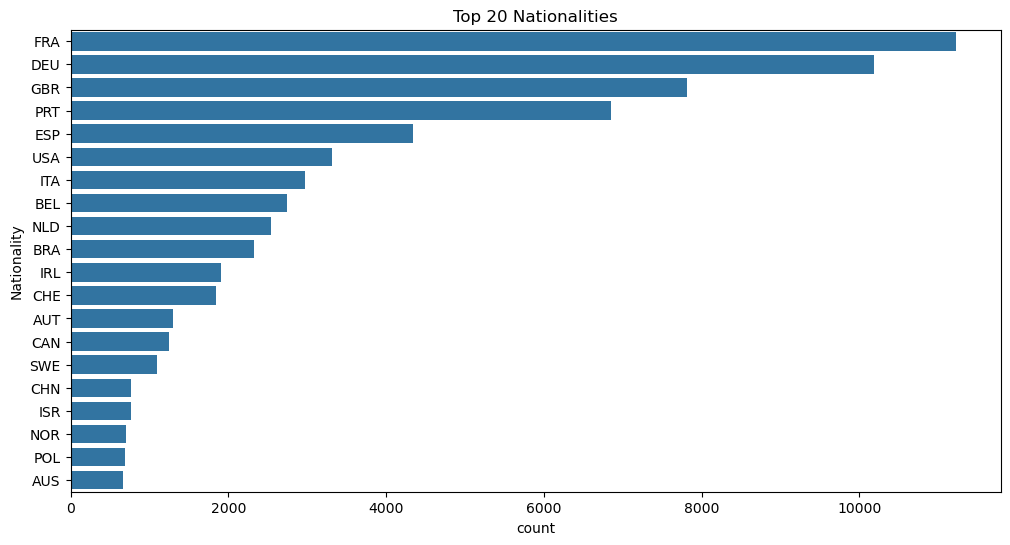

In [29]:
# Plot the top20 nationalities
plt.figure(figsize=(12, 6))
sns.countplot(data=customers, y='Nationality', order=top20_nationalities)
plt.title('Top 20 Nationalities')
plt.show()

In [30]:
# check how many nationalities have less than 10 occurrences
nationalities_less_than_10 = nationality_counts[nationality_counts < 10].index
print(f'There are {nationalities_less_than_10.shape[0]} nationalities with less than 10 occurrences')

There are 96 nationalities with less than 10 occurrences


In [31]:
# check for correlation between nationality and other columns
customers.select_dtypes(include=[np.number]).corr()['TotalRevenue'].sort_values(ascending=False)

TotalRevenue            1.000000
LodgingRevenue          0.963684
OtherRevenue            0.646891
RoomNights              0.592649
PersonsNights           0.571622
BookingsCheckedIn       0.183822
SRQuietRoom             0.068936
AverageLeadTime         0.058688
BookingsCanceled        0.054589
BookingsNoShowed        0.047389
SRKingSizeBed           0.034574
SRCrib                  0.025796
SRHighFloor             0.025118
SRTwinBed               0.020694
SRAwayFromElevator      0.014768
SRShower                0.013184
SRBathtub               0.008819
SRLowFloor              0.007693
SRNoAlcoholInMiniBar    0.004903
SRMediumFloor           0.004654
SRNearElevator          0.002045
SRAccessibleRoom       -0.001953
Age                    -0.042690
DaysSinceCreation      -0.117454
Name: TotalRevenue, dtype: float64

In [32]:
# # Revenue per country
# list_of_countries_revenue = customers.groupby('Nationality')['TotalRevenue'].sum().reset_index()
# list_of_countries_revenue.set_index('Nationality', inplace=True)

# number_of_clients = data['Nationality'].value_counts().reset_index()
# number_of_clients.set_index('Nationality', inplace=True)

In [33]:

# country_counts = customers['Nationality'].value_counts().reset_index()
# country_counts.columns = ['ISO_A3', 'clients']

# world = gpd.read_file("../ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp")

In [34]:
# Merge the world map with client data
# world = world.merge(country_counts, how="left", left_on="ISO_A3_EH", right_on="ISO_A3")

# Fill missing values with 0 (countries with no clients)
# world["clients"] = world["clients"].apply(lambda x: 0 if x < 1 else x)

In [35]:
# world = world.dropna(subset='clients')

In [36]:
#country_counts

In [37]:
#country_counts['ISO_A3'].value_counts()

In [38]:
# columns_to_keep_worldviz = ['ISO_A3_EH', 'clients', 'geometry', 'NAME']
# more_collumns_to_keep = ['TotalRevenue']
# world_viz= world[columns_to_keep_worldviz]
# world_viz.set_index('ISO_A3_EH', inplace=True)
# world_viz[more_collumns_to_keep] = list_of_countries_revenue[more_collumns_to_keep]
# world_viz.reset_index(inplace=True)

In [39]:
# Please choose a better set of colours

# m = world_viz.explore(column='clients', cmap='hot', legend=False, edgecolor='black', linewidth=0.8, legend_name='Number of Clients')

In [40]:
#m

#### 1.5.1.2 DistributionChannel

**Insights:**

- Most bookings are made through a Travel Agent/Operator (~84%)
- Only 13% of the bookings are made directly with the hotel.

In [41]:
# Check the distribution of DistributionChannel
distribution_channel = customers["DistributionChannel"].value_counts()
distribution_channel

DistributionChannel
Travel Agent/Operator    60193
Direct                    9469
Corporate                 1937
GDS Systems                533
Name: count, dtype: int64

In [42]:
# Compute the percentages of each distribution channel
distribution_channel_percentages = round(distribution_channel/customers.shape[0]*100,2)
distribution_channel_percentages

DistributionChannel
Travel Agent/Operator    83.45
Direct                   13.13
Corporate                 2.69
GDS Systems               0.74
Name: count, dtype: float64

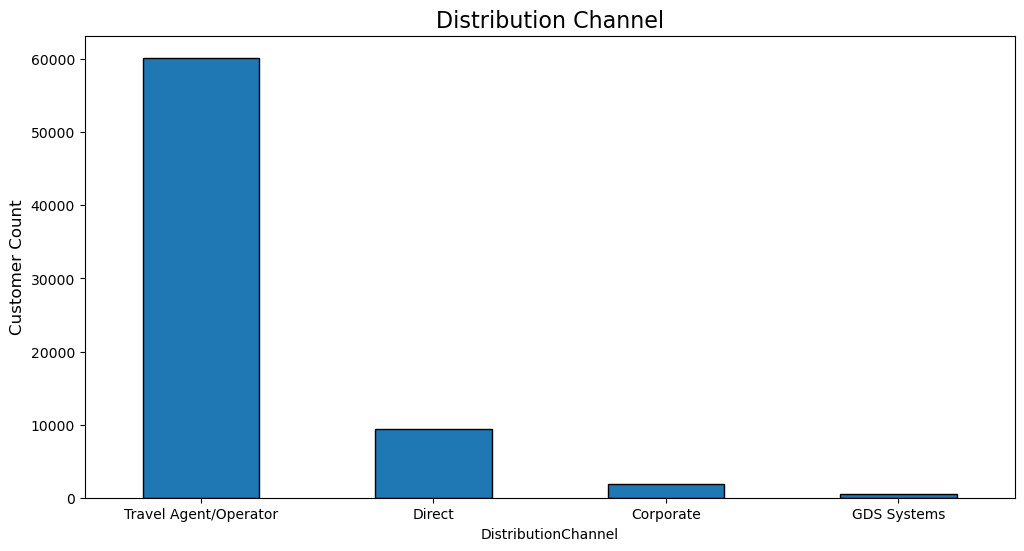

In [43]:
# Plot a bar chart 
plt.figure(figsize=(12, 6))
distribution_channel.plot(kind="bar", edgecolor="black")
plt.title("Distribution Channel", fontsize=16)
plt.ylabel("Customer Count", fontsize=12)
plt.xticks(rotation=0)
plt.show()

### 1.5.2 Numerical Variables

#### 1.5.2.1 Age

**Insights:**

- There were 218 missing values;
- Only 0.01% (10) of customers are above 90 years old. We decided to drop them, as we considered them outliers.
- Cases where age was negative were turn into NaN.
- Missing values were filled using KNN Imputer for the 5 nearners neighbors. <br>

`The average age is 48.53 and the median age is 48.0.`

In [44]:
# Check missing values in age column
missing_age = customers['Age'].isnull().sum()
print(f'There are {missing_age} missing values in the Age column.')

There are 218 missing values in the Age column.


In [45]:
# Check the min and max values of Age
min_age = customers['Age'].min()
max_age = customers['Age'].max()
print(f'The minimum age is {min_age} and the maximum age is {max_age}.')

The minimum age is -10.0 and the maximum age is 115.0.


In [46]:
# Check age correlation with other columns 
customers.select_dtypes(include=[np.number]).corr()['Age'].sort_values(ascending=False)

Age                     1.000000
AverageLeadTime         0.251928
OtherRevenue            0.065292
DaysSinceCreation       0.054238
SRTwinBed               0.046665
SRLowFloor              0.015800
SRNearElevator          0.013889
SRQuietRoom             0.012411
BookingsCheckedIn       0.011285
SRAwayFromElevator      0.008628
BookingsCanceled        0.007127
SRMediumFloor           0.007038
SRShower                0.006936
BookingsNoShowed        0.006913
SRAccessibleRoom        0.002658
RoomNights              0.001424
SRNoAlcoholInMiniBar   -0.006426
PersonsNights          -0.019733
SRBathtub              -0.021258
SRKingSizeBed          -0.024277
SRHighFloor            -0.025744
TotalRevenue           -0.042690
SRCrib                 -0.072649
LodgingRevenue         -0.074331
Name: Age, dtype: float64

Our goal by checking this correlation was to see if any variable was correlated with age enough, that we could use in a predictive model to predict age. Since the highest correlated variable is 25% correlation, we discarded this idea, and just assumed to input median.

In [47]:
# Check cases where age is negative
print(f'There are {len(customers[customers['Age'] < 0])} cases where age is negative')
customers[customers['Age'] < 0]

There are 12 cases where age is negative


,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalRevenue
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
5128,FRA,-8.0,1271,66,93.30,14.00,0,0,1,2,1,Travel Agent/Operator,0,0,0,0,0,0,0,1,0,0,0,0,0,107.30
6752,GBR,-10.0,1243,22,450.00,18.00,0,0,1,1,1,Travel Agent/Operator,0,0,0,0,0,0,0,1,0,0,0,0,0,468.00
8361,DEU,-6.0,1217,256,126.00,109.00,0,0,1,4,2,Travel Agent/Operator,0,0,0,0,0,0,0,0,1,0,0,0,0,235.00
8629,NLD,-9.0,1213,111,414.60,34.00,0,0,1,4,4,Travel Agent/Operator,0,0,0,0,0,0,0,1,0,0,0,0,0,448.60
9920,DZA,-5.0,1193,54,138.93,29.50,0,0,1,4,1,Travel Agent/Operator,0,0,0,0,0,0,0,1,0,0,0,0,0,168.43
10663,DEU,-9.0,1181,292,126.00,113.00,0,0,1,4,2,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,239.00
10695,DEU,-9.0,1181,292,128.00,57.50,0,0,1,2,2,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,185.50
10756,PRT,-5.0,1181,292,128.00,55.00,0,0,1,2,2,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,183.00
14322,PRT,-9.0,1127,346,128.00,53.00,0,0,1,2,2,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,181.00


In [48]:
# Check cases where age is above 100
print(f'There are {len(customers[customers['Age'] > 90])} cases where age is above 90 years old, which corresponds to {len(customers[customers["Age"] > 90])/len(customers)*100:.2f}% of the data.')
customers[customers['Age'] > 90]

There are 10 cases where age is above 90 years old, which corresponds to 0.01% of the data.


,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalRevenue
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
3282,PRT,115.0,1305,22,79.00,25.5,0,0,1,2,1,Travel Agent/Operator,0,0,0,0,0,0,0,1,0,0,0,0,0,104.50
7425,DEU,92.0,1231,0,535.00,170.0,0,0,1,2,1,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,705.00
19867,PRT,93.0,1039,18,68.00,14.0,0,0,1,2,1,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,82.00
44525,DEU,114.0,627,7,234.00,34.5,0,0,1,4,2,Travel Agent/Operator,0,0,0,0,0,0,0,1,0,0,0,0,0,268.50
45089,PRT,115.0,620,2,266.00,43.0,0,0,1,2,2,Travel Agent/Operator,1,0,0,0,0,0,0,1,0,0,0,0,0,309.00
62694,NOR,97.0,467,87,734.00,24.0,0,0,1,12,6,Travel Agent/Operator,0,0,0,0,0,0,0,0,1,0,0,0,0,758.00
67362,GBR,93.0,432,78,237.00,55.0,0,0,1,3,3,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,292.00
72434,PRT,91.0,396,254,226.00,28.0,0,0,1,4,2,Travel Agent/Operator,0,0,0,0,0,0,0,1,0,0,0,0,0,254.00
87089,PRT,111.0,244,18,210.00,52.0,0,0,1,4,2,Direct,1,0,0,0,0,0,0,1,0,0,0,0,0,262.00


In [49]:
# Drop rows where age is above 90
customers = customers[customers['Age'] <= 90]

In [50]:
# Turn the rows with age below 0 to NaN
customers.loc[customers['Age'] < 0, 'Age'] = np.nan

In [51]:
# Drop rows with Age<18
customers = customers[customers['Age'] >= 18]

In [52]:
from sklearn.impute import KNNImputer

# Initialize KNNImputer with k neighbors
imputer = KNNImputer(n_neighbors=5)  

# Apply KNN imputation only to the 'Age' column
customers[['Age']] = imputer.fit_transform(customers[['Age']])


In [53]:
# Fill missing values with median
# customers['Age'].fillna(customers['Age'].median(), inplace=True)

In [54]:
# check for missing values in age
print(f'There are {customers["Age"].isnull().sum()} missing values left in Age column.')

There are 0 missing values left in Age column.


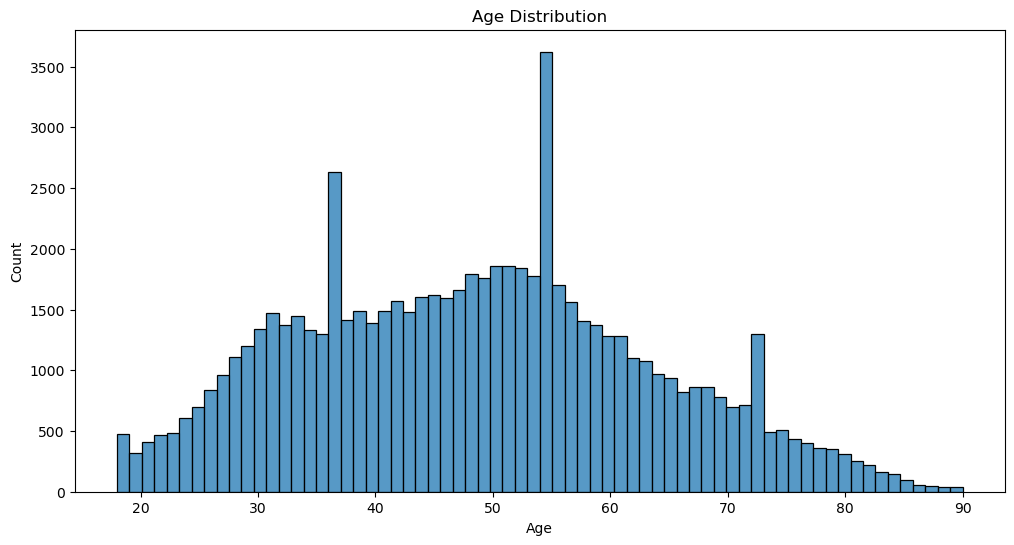

In [55]:
# Check the distribution of Age
plt.figure(figsize=(12, 6))
sns.histplot(customers['Age'])
plt.title('Age Distribution')
plt.show()


In [56]:
customers['Age'].agg(['mean', 'median'])
print(f'The average age is {customers["Age"].mean():.2f} and the median age is {customers["Age"].median()}.')

The average age is 48.53 and the median age is 48.0.


#### 1.5.2.2 DaysSinceCreation

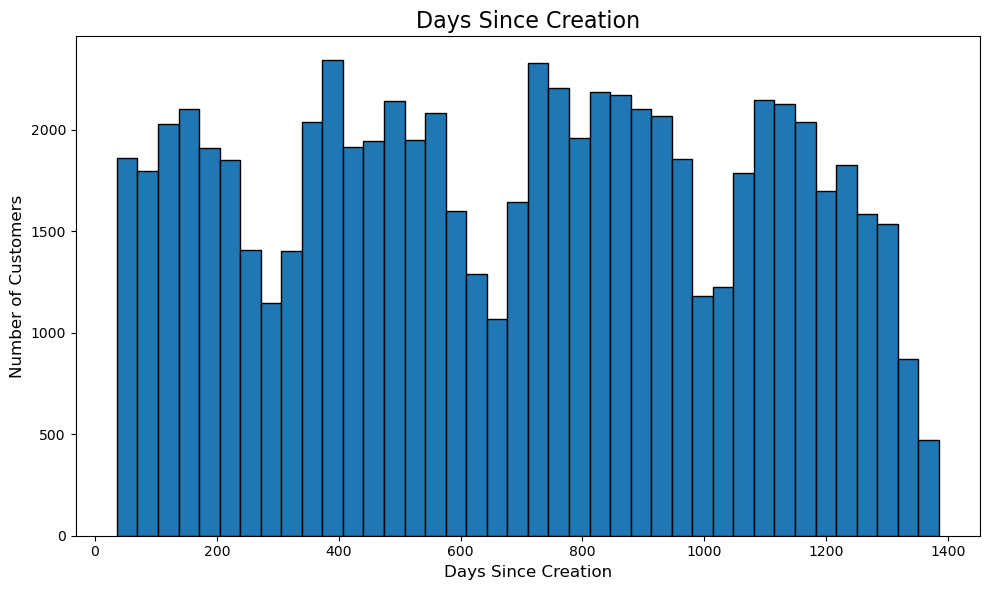

In [57]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(customers["DaysSinceCreation"], bins=40, edgecolor="black")

plt.title("Days Since Creation", fontsize=16)
plt.xlabel("Days Since Creation", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)

plt.tight_layout()  
plt.show()

Can distinguish peaks - high peak recently

Groups 
* group < 365 (less than a year)
* 365 < group < 730 (1-2 years)
* 730 < group < 1095 (2-3 years)
* 1095 < group (more than 3 years)

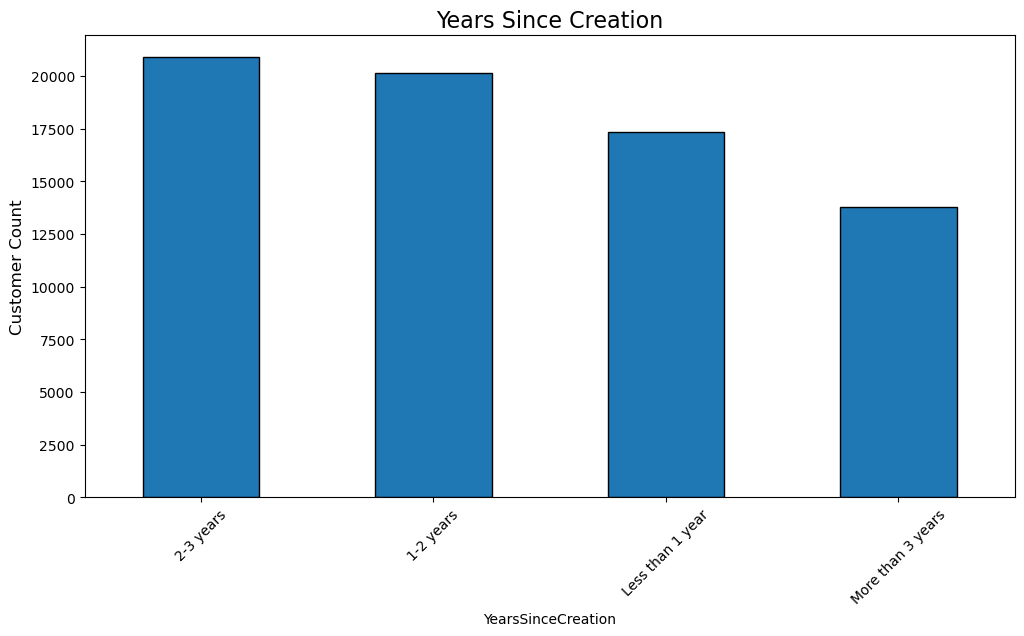

In [58]:
# Define age ranges and their respective labels
creation_date_bins = [0, 365, 730, 1095, float('inf')]
creation_date_labels = ["Less than 1 year", "1-2 years", "2-3 years", "More than 3 years"]

# .cut() segments into the bins and assigns to corresponding labels
customers_numerical["YearsSinceCreation"] = pd.cut(customers_numerical["DaysSinceCreation"], bins=creation_date_bins, labels=creation_date_labels)

# Plot a bar chart 
plt.figure(figsize=(12, 6))

years_since_creation = customers_numerical["YearsSinceCreation"].value_counts()

years_since_creation.plot(kind="bar", edgecolor="black")

plt.title("Years Since Creation", fontsize=16)
plt.ylabel("Customer Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

* Most customers are recent ones, i.e. within their first 2 years since joining
* But there is a large spread (std = 374)

#### Lodging Revenue

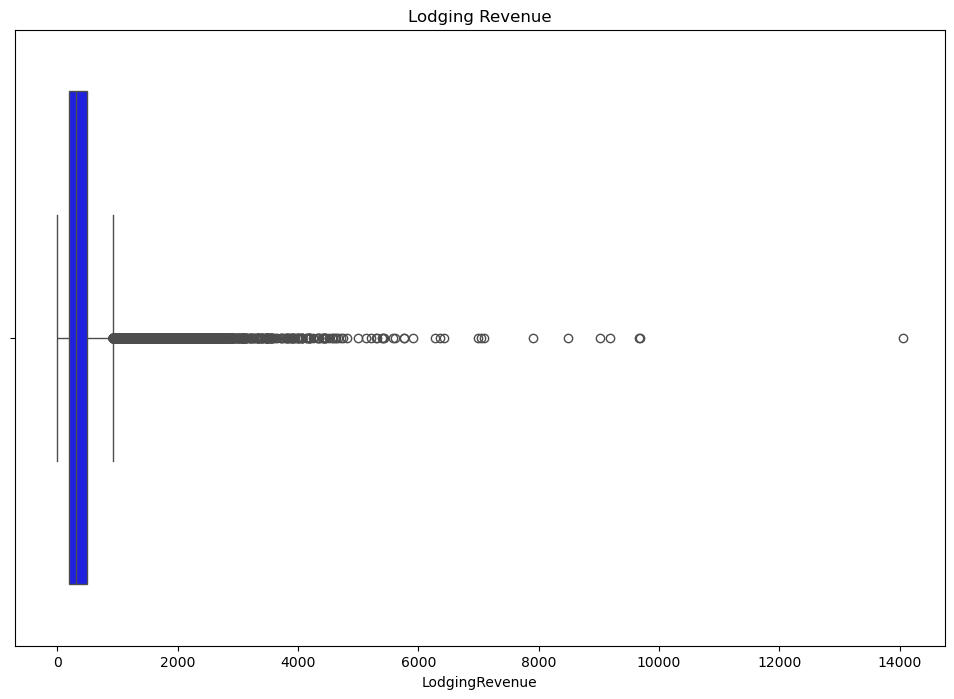

In [59]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=customers['LodgingRevenue'], color='blue')
plt.title('Lodging Revenue')
plt.show()

#### Other Revenue

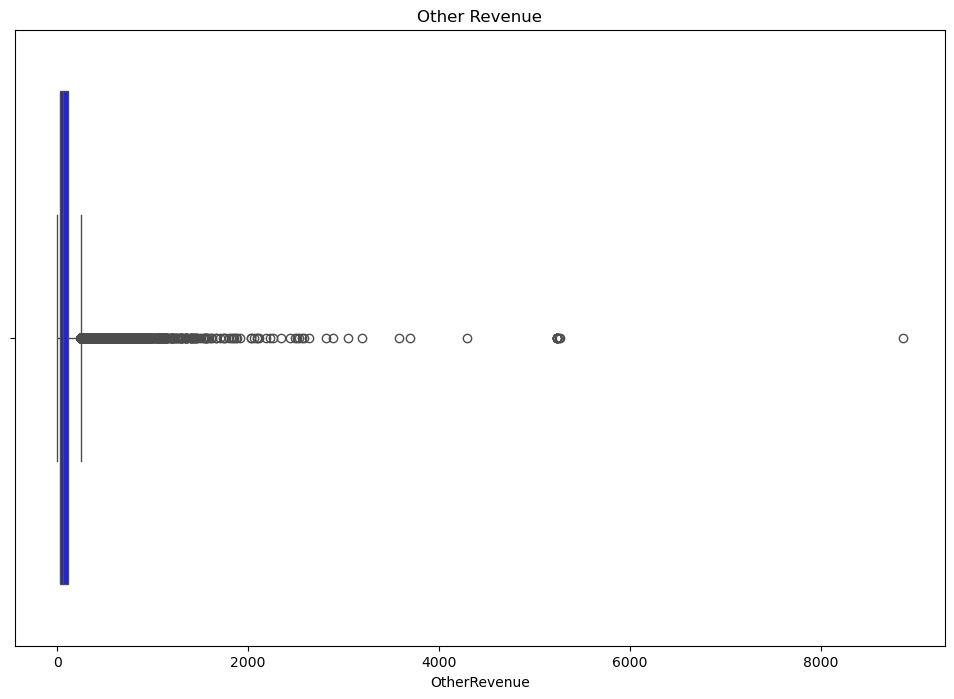

In [60]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=customers['OtherRevenue'], color='blue')
plt.title('Other Revenue')
plt.show()

#### Bookings Canceled

In [61]:
customers['BookingsCanceled'].value_counts()

BookingsCanceled
0     70807
1        63
3         8
2         4
4         1
15        1
7         1
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

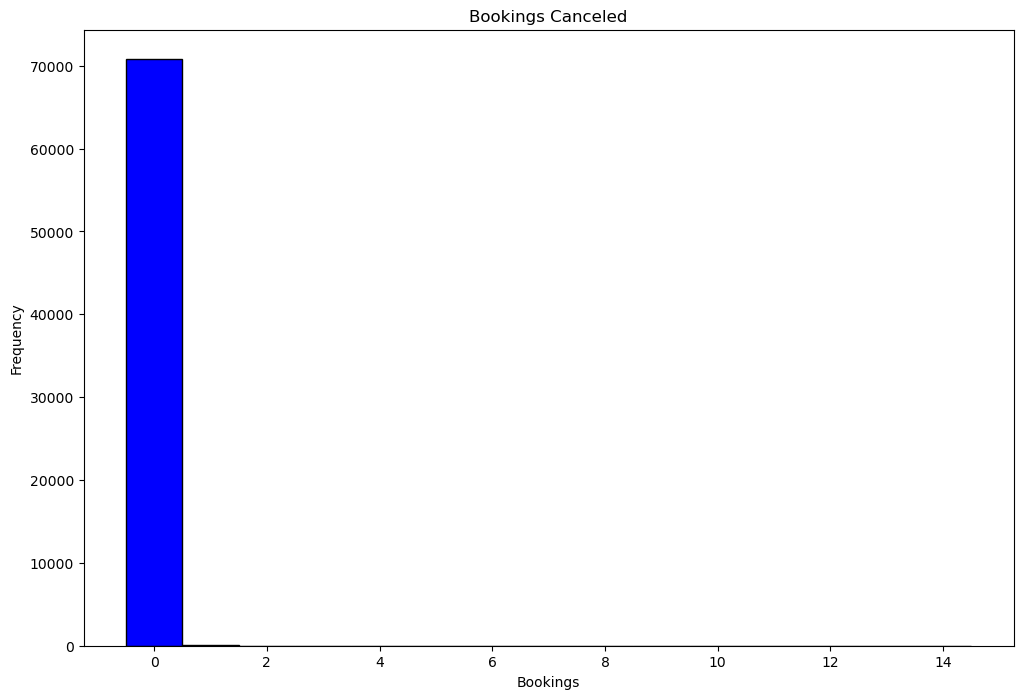

In [62]:
plt.figure(figsize=(12, 8))
plt.hist(customers['BookingsCanceled'], bins=np.arange(-0.5,15.5,1), color='blue', edgecolor='black')
plt.title('Bookings Canceled')
plt.xlabel('Bookings')
plt.ylabel('Frequency')

#### Bookings No Showed

In [63]:
customers['BookingsNoShowed'].value_counts()

BookingsNoShowed
0    70859
1       23
2        3
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

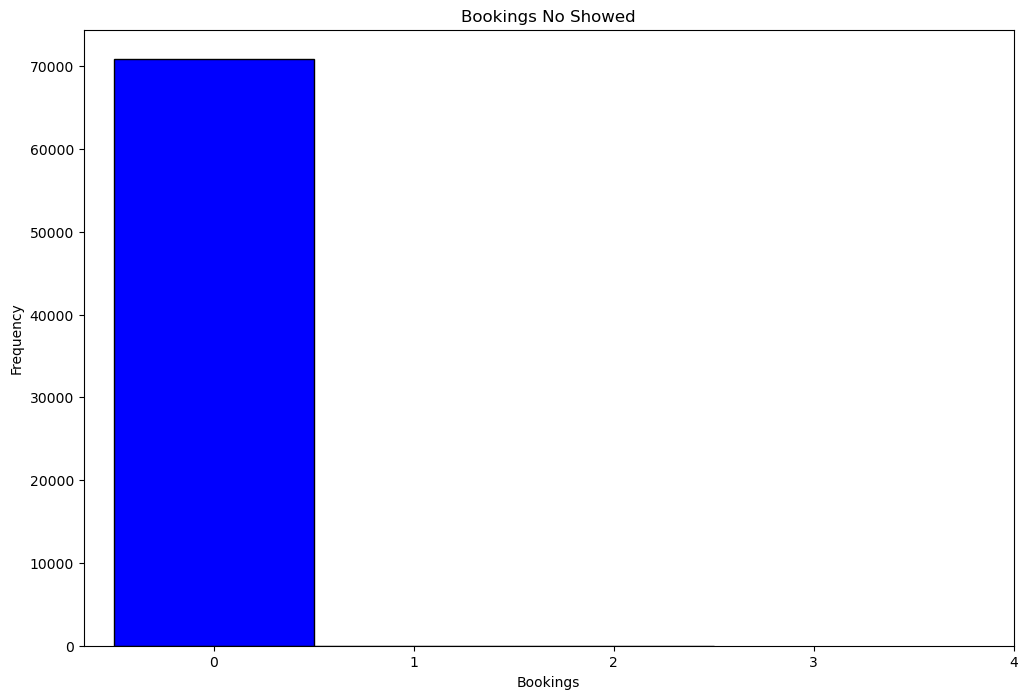

In [64]:
plt.figure(figsize=(12, 8))
plt.hist(customers['BookingsNoShowed'], bins=np.arange(-0.5,3.5,1), color='blue', edgecolor='black')
plt.title('Bookings No Showed')
plt.xticks(range(5))
plt.xlabel('Bookings')
plt.ylabel('Frequency')

Like in the lst feature our customers are good people

#### Bookings Checked In 

In [65]:
customers['BookingsCheckedIn'].value_counts()

BookingsCheckedIn
1     69299
2      1338
3       129
4        29
5        19
7        15
6        11
11        6
8         6
9         5
10        5
13        4
15        3
12        2
16        2
26        2
24        1
18        1
22        1
40        1
38        1
76        1
17        1
29        1
66        1
35        1
Name: count, dtype: int64

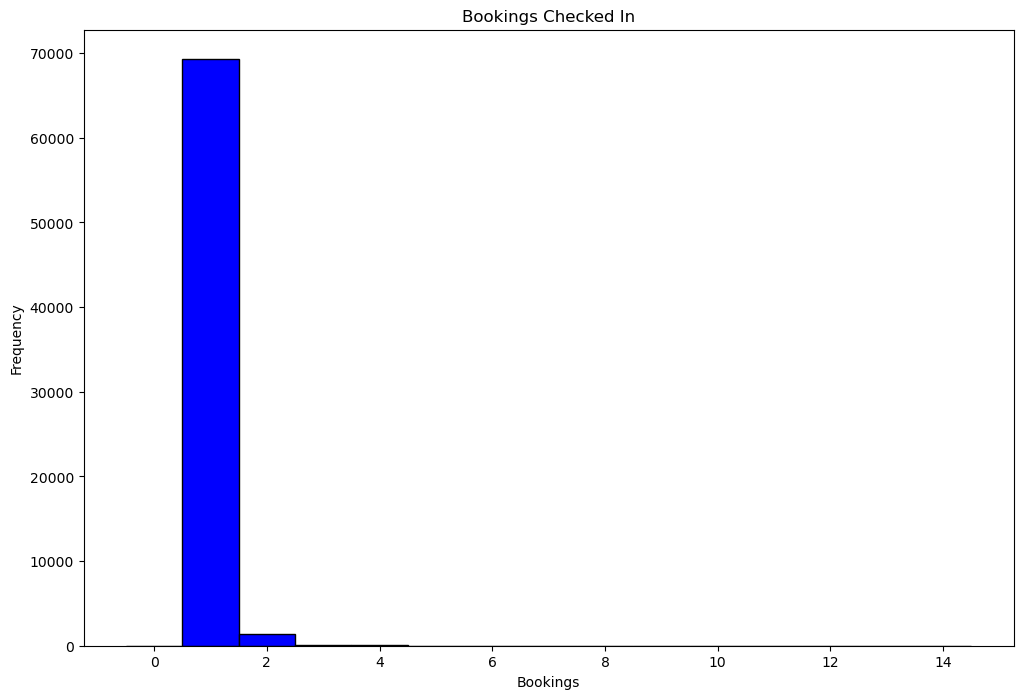

In [66]:
plt.figure(figsize=(12, 8))
plt.hist(customers['BookingsCheckedIn'], bins=np.arange(-0.5,15.5,1), color='blue', edgecolor='black')
plt.title('Bookings Checked In')
plt.xlabel('Bookings')
plt.ylabel('Frequency')
plt.show()

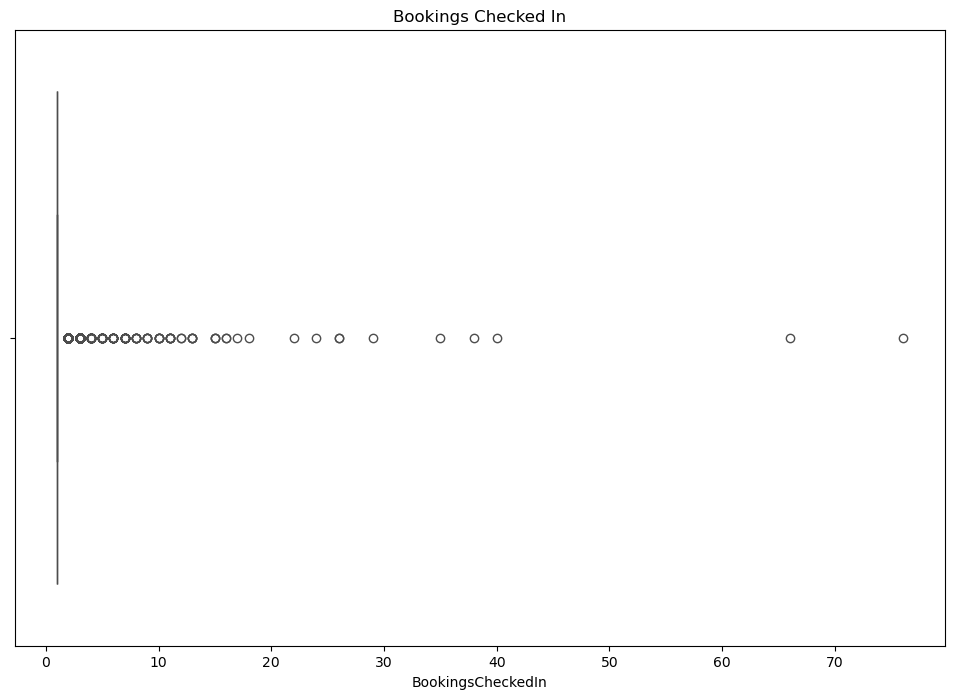

In [67]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=customers['BookingsCheckedIn'], color='blue')
plt.title('Bookings Checked In')
plt.show()

two thirds of our customers have been in our hotel only once

#### Persons Night
(adults + children)*number of nights 

In [68]:
customers['PersonsNights'].value_counts()

PersonsNights
6      15355
4      11809
2       9821
8       9695
3       4333
10      4063
1       3974
12      3673
9       2074
14      1743
5       1002
15       793
16       621
18       452
21       388
20       258
7        243
24       150
28        86
22        48
30        45
27        35
11        33
32        23
36        20
33        20
26        20
13        15
17        11
25        11
19        10
42         7
23         7
35         7
40         5
44         4
39         4
34         4
48         2
45         2
68         2
0          2
38         2
91         1
59         1
29         1
57         1
80         1
31         1
52         1
49         1
116        1
56         1
99         1
75         1
60         1
Name: count, dtype: int64

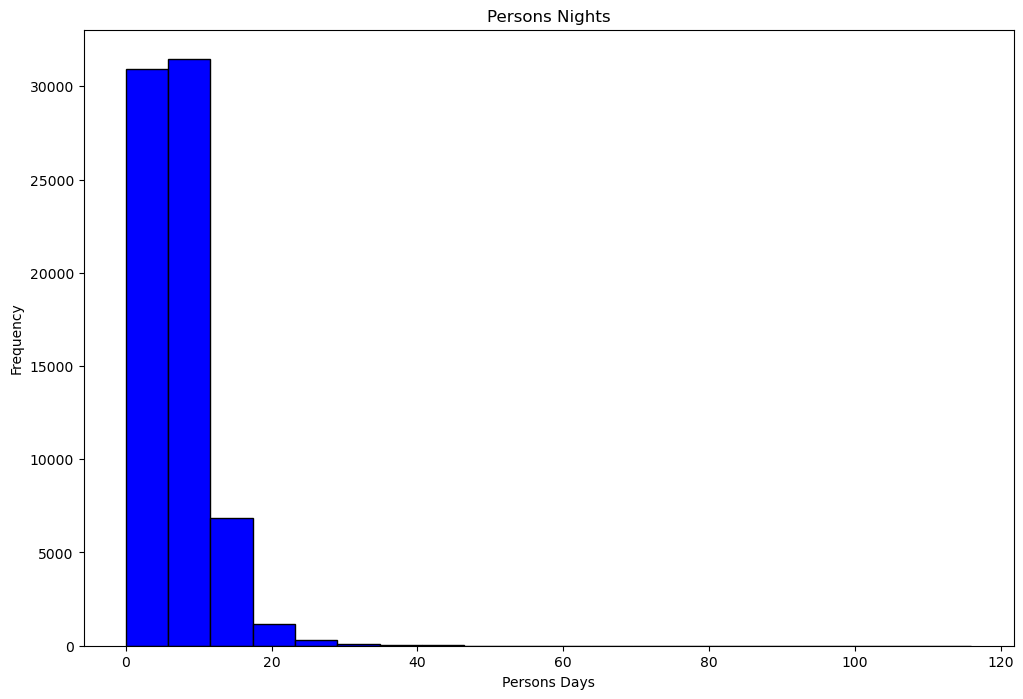

In [69]:
plt.figure(figsize=(12, 8))
plt.hist(customers['PersonsNights'], bins=20, color='blue', edgecolor='black')
plt.title('Persons Nights')
plt.xlabel('Persons Days')
plt.ylabel('Frequency')
plt.show()

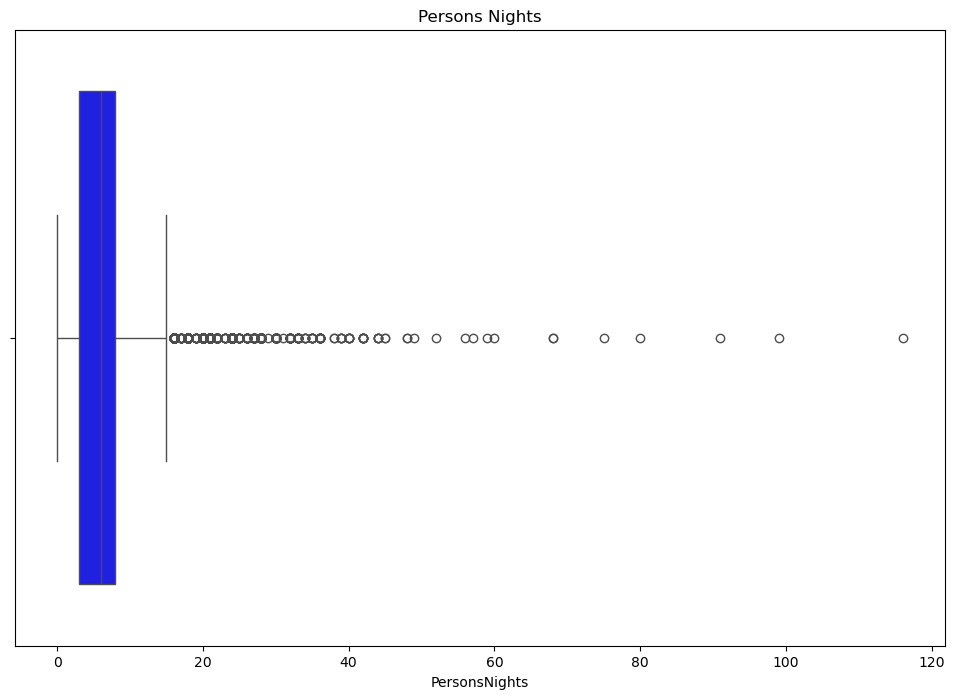

In [70]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=customers['PersonsNights'], color='blue')
plt.title('Persons Nights')
plt.show()

In [71]:
customers_numerical.columns

Index(['Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue',
       'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed',
       'BookingsCheckedIn', 'PersonsNights', 'RoomNights', 'SRHighFloor',
       'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub',
       'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator',
       'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom',
       'TotalRevenue', 'YearsSinceCreation'],
      dtype='object')

### 1.5.3 Binary Variables



#### SRFloor
Making a fusion with the low-high floor 

    If the client has no preference then 0
    If its on a low floor then 1 
    If its on a medium floor then 2
    If its on a high floor then 3
    If asked for more than 1 type of floor then 4

In [72]:
Check0 = customers[(customers['SRHighFloor'] == 1) & (customers['SRLowFloor'] == 1) & (customers['SRMediumFloor'] == 1)]
Check0

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalRevenue
ID,,,,,,,,,,,,,,,,,,,,,,,,,,


In [73]:
# We have 1 customer that usually asks fot a high and low floor but not medium and the same for the cases bellow
Check1 = customers[(customers['SRHighFloor'] == 1) & (customers['SRLowFloor'] == 1) & (customers['SRMediumFloor'] == 0)]
Check1

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalRevenue
ID,,,,,,,,,,,,,,,,,,,,,,,,,,


In [74]:
Check2 = customers[(customers['SRHighFloor'] == 1) & (customers['SRLowFloor'] == 0) & (customers['SRMediumFloor'] == 1)]
Check2

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalRevenue
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
25859,SWE,51.0,921,127,2020.0,220.0,0,0,1,8,2,Travel Agent/Operator,1,0,0,1,0,0,0,1,0,0,0,0,0,2240.0


In [75]:
Check3 = customers[(customers['SRHighFloor'] == 0) & (customers['SRLowFloor'] == 1) & (customers['SRMediumFloor'] == 1)]
Check3

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalRevenue
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
27802,GBR,45.0,891,90,114.0,14.0,0,0,1,2,1,Travel Agent/Operator,0,1,0,1,0,0,0,0,0,0,0,0,1,128.0


In [76]:
# This just means that the customer does not ask for a specific floor
# Check4 = customers[(customers['SRHighFloor'] == 0) & (customers['SRLowFloor'] == 0) & (customers['SRMediumFloor'] == 0)]
# Check4

Uncomment the code after we dealt with the costumers above and if everyone agrees

In [77]:
def type_of_floor(row):
     if row['SRMediumFloor'] == 1 and row['SRHighFloor'] == 1:
         return 4
     elif row['SRLowFloor'] == 1 and row['SRMediumFloor'] == 1:
         return 4
     elif row['SRLowFloor'] == 1:     # preference for lower floors
         return 1
     elif row['SRMediumFloor'] == 1: # preference for medium floors
         return 2
     elif row['SRHighFloor'] == 1:    # preference for higher floors
         return 3
     else:                           # no preference
         return 0 



customers['SRFloor'] = customers.apply(type_of_floor, axis=1)

In [78]:
customers['SRFloor'].value_counts()

SRFloor
0    67735
3     3016
1       87
2       45
4        2
Name: count, dtype: int64

In [79]:
# Getting the percentage of every number in SRFloor
customers['SRFloor'].value_counts(normalize=True)

SRFloor
0    0.955562
3    0.042548
1    0.001227
2    0.000635
4    0.000028
Name: proportion, dtype: float64

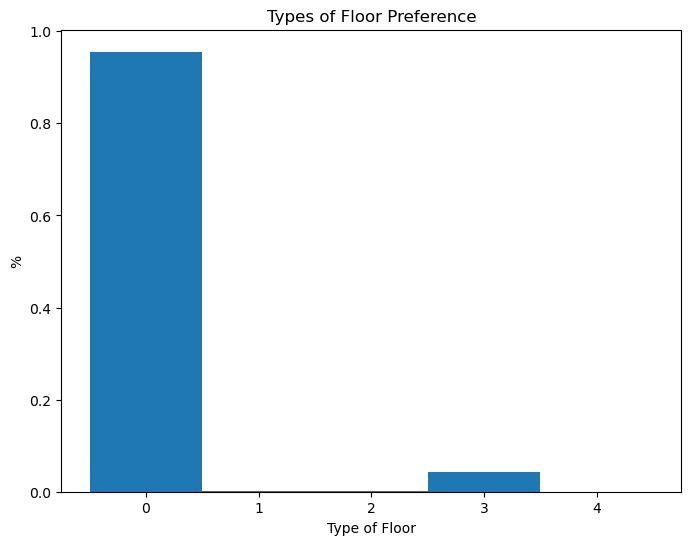

In [80]:
# Plot of types of floors preference 
# This plot could get some improvements 

plt.figure(figsize=(8, 6))
plt.hist(customers['SRFloor'], bins=np.arange(-0.5,5.5,1), weights=[1 / len(customers['SRFloor'])] * len(customers['SRFloor']))
plt.title('Types of Floor Preference')
plt.xticks(range(5))
plt.xlabel('Type of Floor')
plt.ylabel('%')
plt.show()

#### SRBathtubShower

We are going to join these two features where:

    If the client has no preference then its 0
    If the client usually asks for a room with a bathtub then 1
    If the client usually asks for a room with a shower then 2

In [81]:
customers['SRBathtub'].value_counts()

SRBathtub
0    70672
1      213
Name: count, dtype: int64

In [82]:
check1 = customers[(customers['SRBathtub'] == 1) & (customers['SRShower'] == 1)]
check1

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalRevenue,SRFloor
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [83]:
def bathroom(row):
    if row['SRBathtub'] == 0 and row['SRShower'] == 0:
        return 0
    elif row['SRBathtub'] == 1:
        return 1
    elif row['SRShower'] == 1:
        return 2
    else:
        return 0
    
customers['SRBathroom'] = customers.apply(bathroom, axis=1)

In [84]:
customers['SRBathroom'].value_counts()

SRBathroom
0    70550
1      213
2      122
Name: count, dtype: int64

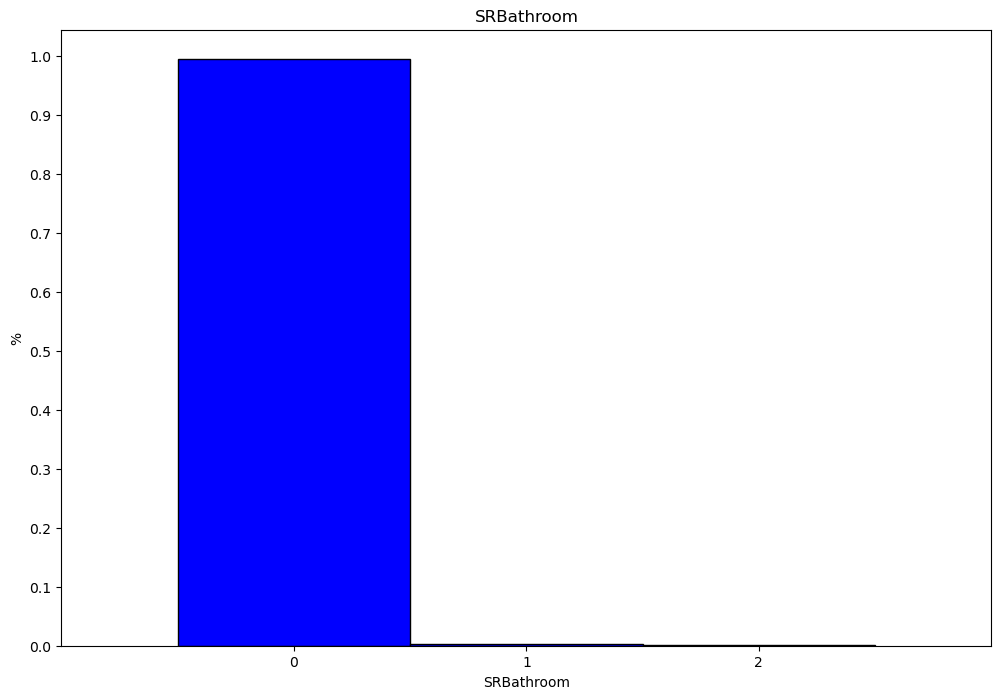

99.53% of our costumers have no preference
0.30% of our costumers ask for a bathtub
0.30% of our costumers ask for a shower


In [85]:
plt.figure(figsize=(12, 8))
plt.hist(customers['SRBathroom'], bins=[-0.5,0.5,1.5,2.5], color='blue', weights=[1 / len(customers['SRBathroom'])] * len(customers['SRBathroom']), edgecolor='black')
plt.title('SRBathroom')
plt.xlabel('SRBathroom')
plt.ylabel('%')
plt.xticks(range(3))
plt.yticks([i/10 for i in range(11)])
plt.xlim([-1, 3])
plt.show()

print(f'{len(customers[customers["SRBathroom"]==0])/len(customers['SRBathroom'])*100:.2f}% of our costumers have no preference')
print(f'{len(customers[customers["SRBathroom"]==1])/len(customers['SRBathroom'])*100:.2f}% of our costumers ask for a bathtub')
print(f'{len(customers[customers["SRBathroom"]==1])/len(customers['SRBathroom'])*100:.2f}% of our costumers ask for a shower')

#### SRCrib

In [86]:
customers['SRCrib'].value_counts()

SRCrib
0    70146
1      739
Name: count, dtype: int64

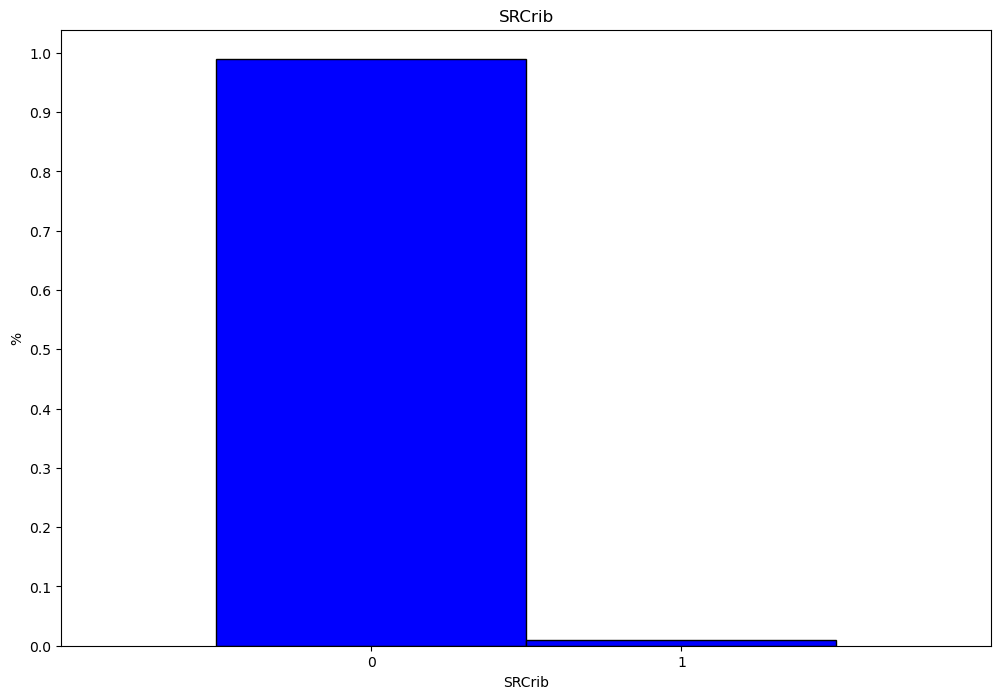

98.96% of our costumers do not ask for a crib
1.04% of our costumers ask for a crib


In [87]:
plt.figure(figsize=(12, 8))
plt.hist(customers['SRCrib'], bins=[-0.5, 0.5, 1.5], color='blue', weights=[1 / len(customers['SRCrib'])] * len(customers['SRCrib']), edgecolor='black')
plt.title('SRCrib')
plt.xlabel('SRCrib')
plt.ylabel('%')
plt.xticks(range(2))
plt.yticks([i/10 for i in range(11)])
plt.xlim([-1, 2])
plt.show()

print(f'{len(customers[customers["SRCrib"]==0])/len(customers['SRCrib'])*100:.2f}% of our costumers do not ask for a crib')
print(f'{len(customers[customers["SRCrib"]==1])/len(customers['SRCrib'])*100:.2f}% of our costumers ask for a crib')

#### Elevator

We are going to join these two features where:

    If the client has no preference then its 0
    If the client usually asks for a room near the elevator then 1
    If the client usually asks for a room away from the elevator then 2

In [88]:
check1 = customers[(customers['SRNearElevator'] == 1) & (customers['SRAwayFromElevator'] == 1)]
check1

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalRevenue,SRFloor,SRBathroom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [89]:
def elevator(row):
    if row['SRNearElevator'] == 0 and row['SRAwayFromElevator'] == 0:
        return 0
    elif row['SRNearElevator'] == 1:
        return 1
    elif row['SRAwayFromElevator'] == 1:
        return 2
    else:
        return 0

In [90]:
customers['SRElevator'] = customers.apply(elevator, axis=1)

In [91]:
customers['SRElevator'].value_counts()

SRElevator
0    70599
2      262
1       24
Name: count, dtype: int64

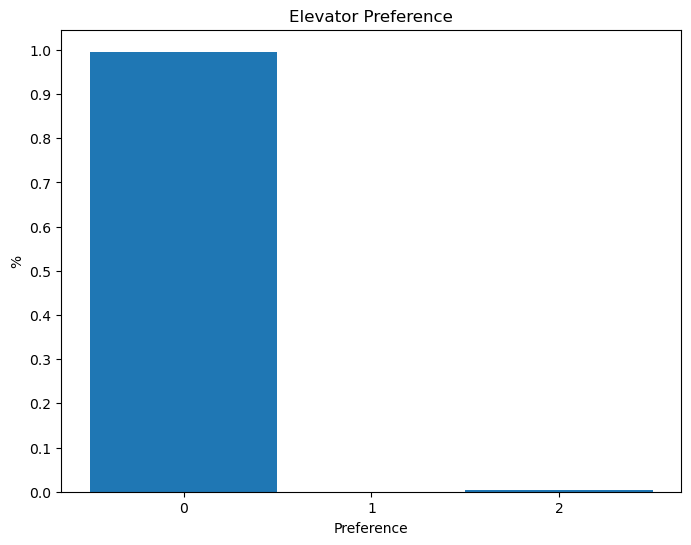

99.60% of our costumers have no preference
0.03% of our costumers prefere to have a elevator near
0.37% of our costumers prefere to have a elevator away


In [92]:
plt.figure(figsize=(8, 6))
plt.hist(customers['SRElevator'], bins=[-0.5,0.5,1.5,2.5], weights=[1 / len(customers['SRElevator'])] * len(customers['SRElevator']))
plt.title('Elevator Preference')
plt.xticks(range(3))
plt.yticks([i/10 for i in range(11)])
plt.xlabel('Preference')
plt.ylabel('%')
plt.show()

print(f'{len(customers[customers['SRElevator']==0])/len(customers['SRElevator'])*100:.2f}% of our costumers have no preference')
print(f'{len(customers[customers['SRElevator']==1])/len(customers['SRElevator'])*100:.2f}% of our costumers prefere to have a elevator near')
print(f'{len(customers[customers['SRElevator']==2])/len(customers['SRElevator'])*100:.2f}% of our costumers prefere to have a elevator away')

#### SRBed

We are going to join these two features where:

    If the client has no preference then its 0
    If the client usually asks for a room with a King size bed then 1
    If the client usually asks for a room with a twin bed then 2

In [93]:
check1 = customers[(customers['SRKingSizeBed'] == 1) & (customers['SRTwinBed'] == 1)]
check1.sample(10)

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalRevenue,SRFloor,SRBathroom,SRElevator
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
40214,DEU,64.0,713,79,285.30,162.5,0,0,1,6,3,Travel Agent/Operator,0,0,0,0,0,0,0,1,1,0,0,0,0,447.80,0,0,0
30341,DEU,50.0,855,28,109.00,523.5,0,0,1,2,1,Travel Agent/Operator,0,0,0,0,0,0,0,1,1,0,0,0,0,632.50,0,0,0
93777,BRA,64.0,182,183,1243.20,368.5,0,0,1,24,6,Travel Agent/Operator,0,0,0,0,0,0,0,1,1,0,0,0,0,1611.70,0,0,0
85947,CHN,53.0,257,11,205.83,48.0,0,0,1,6,2,Travel Agent/Operator,0,0,0,0,0,0,0,1,1,0,0,0,1,253.83,0,0,0
42661,BRA,57.0,661,41,1389.75,30.0,0,0,1,10,5,Travel Agent/Operator,0,0,0,0,0,0,0,1,1,0,0,0,0,1419.75,0,0,0
42714,CHN,46.0,659,24,981.00,150.0,0,0,1,6,3,Travel Agent/Operator,0,0,0,0,0,0,0,1,1,0,0,0,0,1131.00,0,0,0
17020,GBR,51.0,1088,18,564.00,43.0,0,0,1,8,2,Travel Agent/Operator,0,0,0,0,0,0,0,1,1,0,0,0,0,607.00,0,0,0
63382,BRA,51.0,463,101,238.00,4.0,0,0,1,4,2,Travel Agent/Operator,1,0,0,0,0,0,0,1,1,0,0,0,0,242.00,3,0,0
64642,DEU,54.0,453,171,282.00,48.0,0,0,1,4,2,Travel Agent/Operator,0,0,0,0,0,0,0,1,1,0,0,0,0,330.00,0,0,0


Not sure what to do with this maybe create 3 category

In [94]:
customers.columns

Index(['Nationality', 'Age', 'DaysSinceCreation', 'AverageLeadTime',
       'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DistributionChannel', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom', 'TotalRevenue', 'SRFloor',
       'SRBathroom', 'SRElevator'],
      dtype='object')

#### No Alcohol in MiniBar

In [95]:
customers['SRNoAlcoholInMiniBar'].value_counts()

SRNoAlcoholInMiniBar
0    70875
1       10
Name: count, dtype: int64

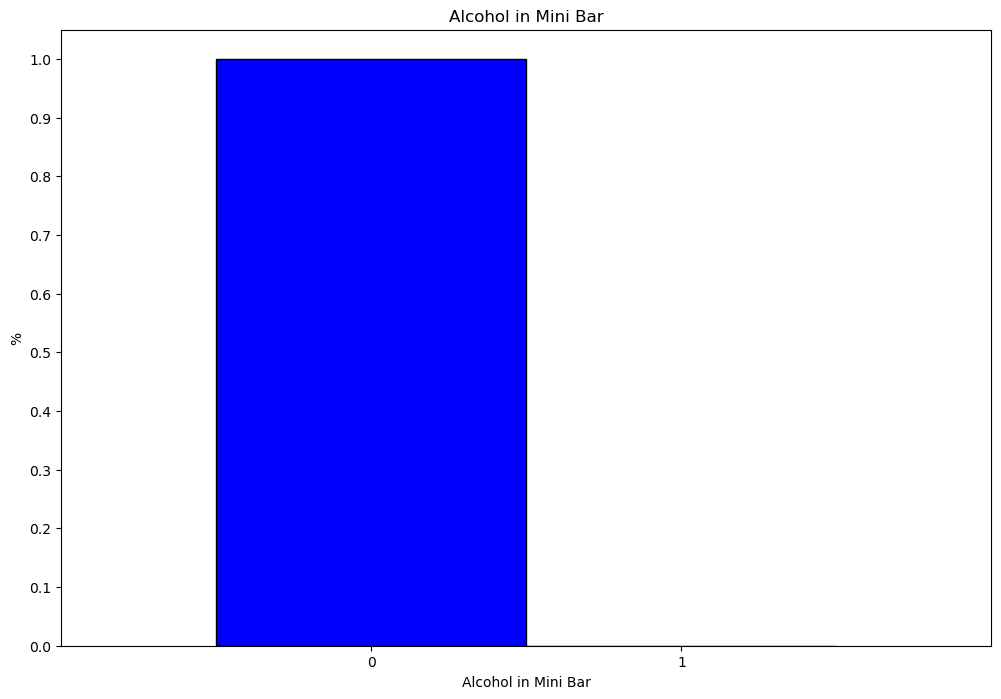

99.99% of our costumers don't ask for no alcohol in the mini bar
0.01% of our costumers ask for no Alcohol in Mini Bar


In [96]:
plt.figure(figsize=(12, 8))
plt.hist(customers['SRNoAlcoholInMiniBar'], bins=[-0.5, 0.5, 1.5], color='blue', weights=[1 / len(customers['SRNoAlcoholInMiniBar'])] * len(customers['SRNoAlcoholInMiniBar']), edgecolor='black')
plt.title('Alcohol in Mini Bar')
plt.xlabel('Alcohol in Mini Bar')
plt.ylabel('%')
plt.xticks(range(2))
plt.yticks([i/10 for i in range(11)])
plt.xlim([-1, 2])
plt.show()

print(f"{len(customers[customers["SRNoAlcoholInMiniBar"]==0])/len(customers['SRNoAlcoholInMiniBar'])*100:.2f}% of our costumers don't ask for no alcohol in the mini bar")
print(f'{len(customers[customers["SRNoAlcoholInMiniBar"]==1])/len(customers['SRNoAlcoholInMiniBar'])*100:.2f}% of our costumers ask for no Alcohol in Mini Bar')

#### Quiet Room

In [97]:
customers['SRQuietRoom'].value_counts()

SRQuietRoom
0    64602
1     6283
Name: count, dtype: int64

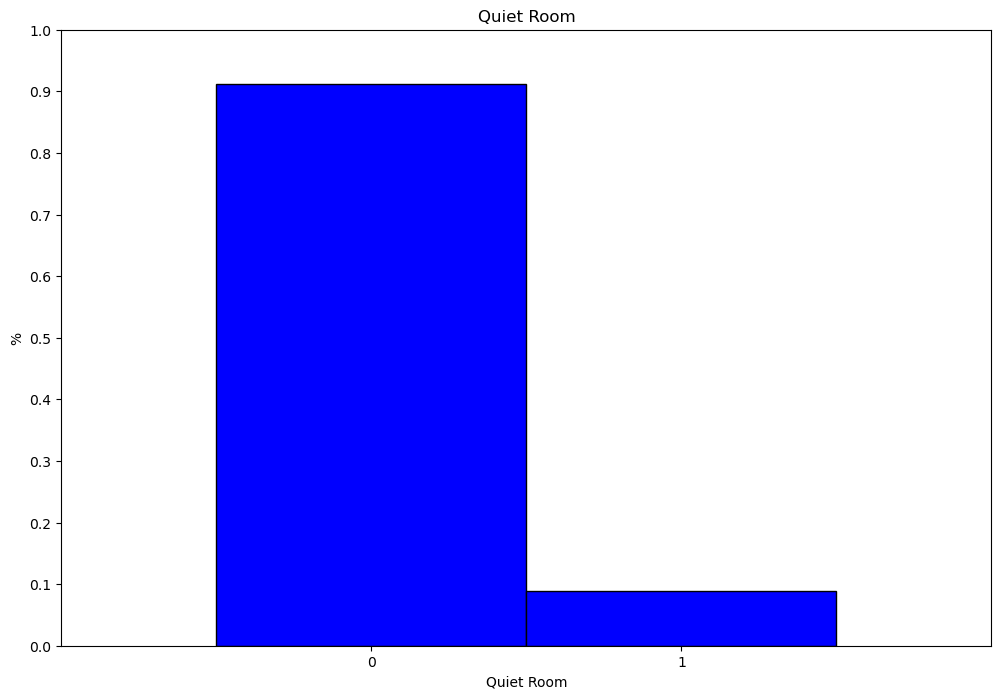

91.14% of our costumers don't ask for a quieet room
8.86% of our costumers ask for a quiet room


In [98]:
plt.figure(figsize=(12, 8))
plt.hist(customers['SRQuietRoom'], bins=[-0.5, 0.5, 1.5], color='blue', weights=[1 / len(customers['SRQuietRoom'])] * len(customers['SRQuietRoom']), edgecolor='black')
plt.title('Quiet Room')
plt.xlabel('Quiet Room')
plt.ylabel('%')
plt.xticks(range(2))
plt.yticks([i/10 for i in range(11)])
plt.xlim([-1, 2])
plt.show()

print(f"{len(customers[customers["SRQuietRoom"]==0])/len(customers['SRQuietRoom'])*100:.2f}% of our costumers don't ask for a quieet room")
print(f'{len(customers[customers["SRQuietRoom"]==1])/len(customers['SRQuietRoom'])*100:.2f}% of our costumers ask for a quiet room')

# 1.6 Feature Engineering

## 1.6.1 TotalSR

In [109]:
customers.head()

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalRevenue,SRFloor,SRBathroom,SRElevator,TotalSR
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,PRT,52.0,440,59,292.0,82.3,1,0,2,6,4,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0,374.3,0,0,0,0
4,FRA,61.0,1385,93,240.0,60.0,0,0,1,10,5,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,300.0,0,0,0,0
6,JPN,55.0,1385,58,230.0,24.0,0,0,1,4,2,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,254.0,0,0,0,0
8,FRA,33.0,1385,38,535.0,94.0,0,0,1,10,5,Travel Agent/Operator,0,0,0,0,0,0,0,1,0,0,0,0,0,629.0,0,0,0,1
10,IRL,26.0,1385,96,174.0,69.0,0,0,1,6,3,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,243.0,0,0,0,0


In [112]:
# List of columns to exclude
exclude_columns = ['SRFloor', 'SRBathroom', 'SRElevator']

# Filter columns that start with 'SR' and are not in the exclude list
sr_columns_to_sum = [col for col in customers.columns if col.startswith('SR') and col not in exclude_columns]

# Create the TotalSR column by summing the filtered SR columns
customers['TotalSR'] = customers[sr_columns_to_sum].sum(axis=1)

customers['TotalSR'].value_counts()

TotalSR
0    32083
1    31525
2     6622
3      606
4       43
Name: count, dtype: int64

In [114]:
customers['TotalSR'].describe()

count    70879.000000
mean         0.659702
std          0.685518
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: TotalSR, dtype: float64

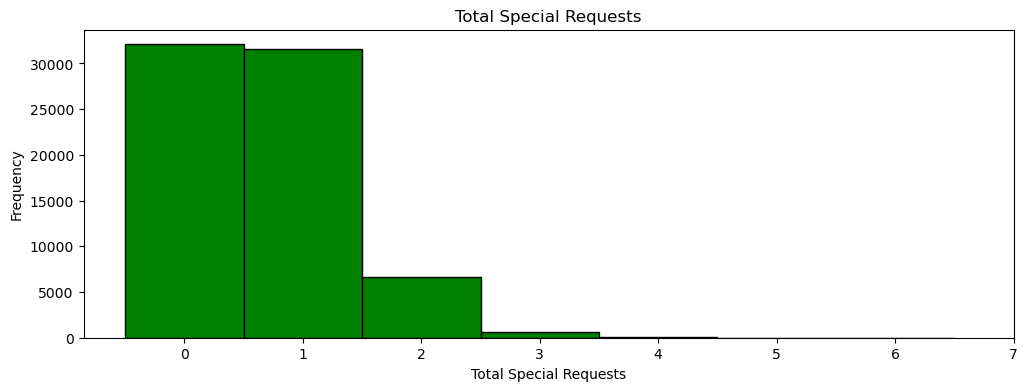

In [117]:
# Make a bar plot of the TotalSR
plt.figure(figsize=(12, 4))
plt.hist(customers['TotalSR'], bins=np.arange(-0.5, 7.5, 1), color='green', edgecolor='black')
plt.title('Total Special Requests')
plt.xlabel('Total Special Requests')
plt.ylabel('Frequency')
plt.xticks(range(8))
plt.show()

## 1.6.2 CancelationRate

In [118]:
# get variables starting with Booking
booking_columns = [col for col in customers.columns if col.startswith('Booking')]
booking_columns

['BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn']

In [ ]:
# Create a new column called cancelation rate which is the ratio of bookings canceled to total bookings
customers['CancelationRate'] = customers['BookingsCanceled'] / (customers['BookingsCanceled'] + customers['BookingsCheckedIn'] + customers['BookingsNoShowed'])

In [121]:
customers['CancelationRate'].describe()

count    70879.000000
mean         0.000317
std          0.011186
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.666667
Name: CancelationRate, dtype: float64

## 1.6.3 RevenuePerNight

In [122]:
#CREATE VARIABLE REVENUE PER NIGHT
customers['RevenuePerNight'] = (customers['LodgingRevenue'] + customers['OtherRevenue']) / customers['RoomNights']

In [123]:
customers['RevenuePerNight'].describe()

count    70879.000000
mean       160.627436
std        103.551277
min          0.333333
25%        106.000000
50%        135.000000
75%        174.500000
max       2394.200000
Name: RevenuePerNight, dtype: float64

## 1.6.4 Location

In [146]:
#CREATE VARIABLE CONTINENT TO GROUP THE DIFFERENT NATIONALITIES, KEEPING THE MOST COMMON NATIONALITIES
#GENERATED WITH CHATGPT
import pycountry_convert as pc

excluded_countries = {'FRA', 'DEU', 'PRT', 'GBR', 'ESP'}

def get_continent(alpha3_code):
    try:
        if alpha3_code in excluded_countries:
            return alpha3_code
        country = pc.country_alpha3_to_country_alpha2(alpha3_code)
        continent_code = pc.country_alpha2_to_continent_code(country)
        if continent_code == 'EU':
            return 'Europe'
        return 'RestOfTheWorld'
    except KeyError:
        return 'RestOfTheWorld'

customers['Location'] = customers['Nationality'].apply(lambda x: get_continent(x))

customers['Location'].value_counts()

Location
Europe            19443
RestOfTheWorld    11781
FRA               11037
DEU               10058
GBR                7724
PRT                6564
ESP                4272
Name: count, dtype: int64

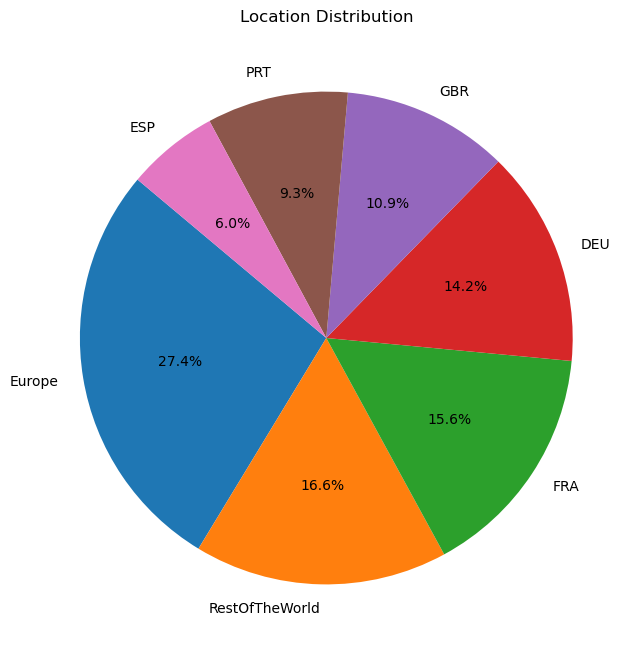

In [149]:

#SEE THE DISTRIBUITION WITH A PIE CHART
plt.figure(figsize=(8, 8))
plt.pie(customers['Location'].value_counts(), labels=customers['Location'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Location Distribution')
plt.show()

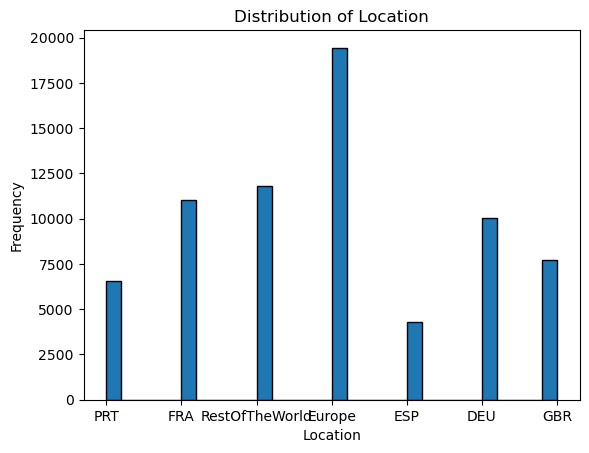

In [150]:
#SEE THE DISTRIBUTION OF THE VARIABLE
plt.hist(customers['Location'], bins=30, edgecolor='black')
plt.title('Distribution of Location')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.show()